<a href="https://colab.research.google.com/github/rasoolmirtalebi/public/blob/main/Regression_Boston_House_Prices_part02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os as os
from google.colab import files

In [ ]:
#opern uploader
#upload file in /content
#see by os.listdir

uploaded = files.upload()
print(os.listdir('/content'))

Saving housing.csv to housing.csv
['.config', 'housing.csv', 'sample_data']


In [ ]:
#read file
#set column name
#print sample data

fileName='housing.csv'
dataframe = pd.read_csv(fileName,sep='\s+',header=None)

num_columns=len(dataframe.columns)
print(num_columns)

dataframe.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(dataframe.head(3))
print(dataframe[['LSTAT','MEDV']].head(5))


14
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
   LSTAT  MEDV
0   4.98  24.0
1   9.14  21.6
2   4.03  34.7
3   2.94  33.4
4   5.33  36.2


In [ ]:
#w1 precalculate

X,Y,XiYi,Xi2=0,0,0,0
n=len(dataframe)
print(n)
for i in range (n):
  X = X + dataframe['LSTAT'][i]
  Y = Y + dataframe['MEDV'][i]
  XiYi = XiYi + dataframe['LSTAT'][i]*dataframe['MEDV'][i]
  Xi2 = Xi2 + dataframe['LSTAT'][i] **2
#print(n,X,Y,XiYi,Xi2)
print(f"{n} {X:.2f} {Y:.2f} {XiYi:.2f} {Xi2:.2f}")

506
506 6402.45 11401.60 119799.16 106762.96


In [ ]:
#w1 calculate

w1 = ((n*XiYi)-(X*Y))/((n*Xi2)-X**2)
#print(w1)
print(f"{w1:.2f}")


-0.95


In [ ]:
#w0

w0= (Y-(w1*X))/n
print(w0)
print(w1,w0)
print(f"y= {w1:.2f} x + {w0:.2f}")

34.55384087938331
-0.950049353758005 34.55384087938331
y= -0.95 x + 34.55


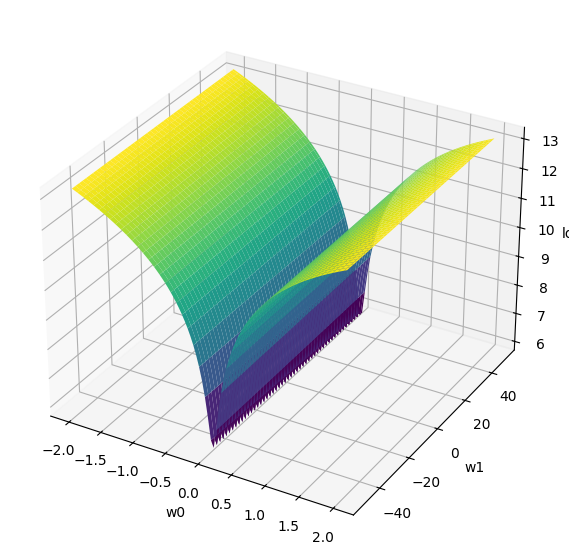

In [ ]:
def MSE_loss(w0,w1,x,y):
  pred = w0 + w1 * x
  loss = np.sum((pred - y) ** 2) / len(y)
  return loss

# Generate grid
w0_vals = np.linspace(-2, 2, 100)
w1_vals = np.linspace(-50, 50, 100)

# Calculate MSE_loss for each ponit of this grid
# Log-scale is used only for better visualization
Z = np.zeros((len(w0_vals),len(w1_vals)))
for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    Z[i,j] = np.log(MSE_loss(w0_vals[i], w1_vals[j], dataframe['LSTAT'], dataframe['MEDV']))

# 3D plot of MSE_loss on log-scale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')

# adding lables
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
plt.show()

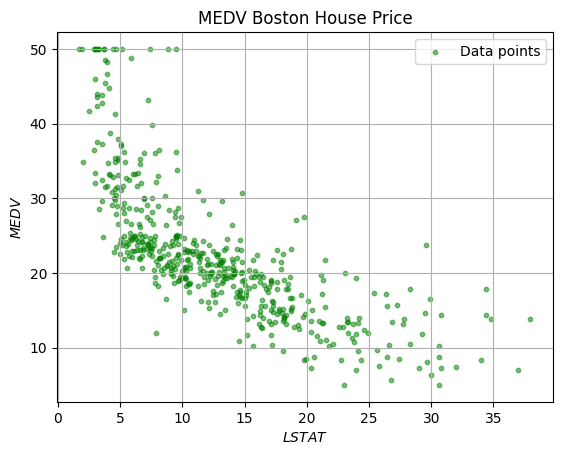

In [ ]:
# Show points

plt.scatter(dataframe['LSTAT'], dataframe['MEDV'], color='green',s=10 , alpha=0.5, label='Data points')
plt.title('MEDV Boston House Price')
plt.xlabel("$LSTAT$")
plt.ylabel("$MEDV$")
plt.legend()
plt.grid(True, which='major', axis='both')
plt.show()

In [ ]:
# Hypothesis: h_w(x) = w0 + w1 * x

def h_w(x, w):
  return w[0] + w[1] * x

# linear regression
def linear_regression_closed_form(X, y):
  # Adding bias term (x_0 = 1) to input 'LSTAT' -->X_b
  X_b = np.c_[np.ones((len(X), 1)), X]
  # colesd-form solution: w = ((X^T * X)^-1) * y^ * X
  w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
  print(f"{X_b[:5]}")
  return w

# Get parameter vector w
X = dataframe['LSTAT']
y = dataframe['MEDV']
w = linear_regression_closed_form(X, y)
print(f"\nParameters (w): ")
print(f"w1 = {w[1]}, w0 = {w[0]}")

[[1.   4.98]
 [1.   9.14]
 [1.   4.03]
 [1.   2.94]
 [1.   5.33]]

Parameters (w): 
w1 = -0.9500493537579864, w0 = 34.553840879383024


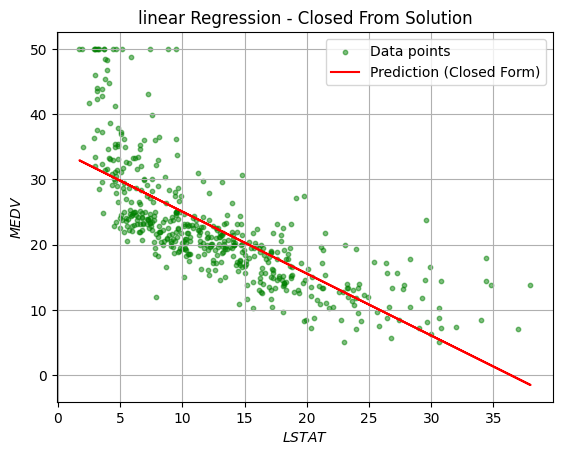

In [ ]:
# show Linear Regression

y_pred = w0 + w1*X
plt.scatter(dataframe['LSTAT'], dataframe['MEDV'], color='green',s=10 , alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("linear Regression - Closed From Solution")
plt.xlabel("$LSTAT$")
plt.ylabel("$MEDV$")
plt.legend()
plt.grid(True, which='major', axis='both')
plt.show()

In [ ]:
# Define a Convex Cost Function

def J_convex(w):
  return w[0]**2 + 2*w[1]**2

def grad_J_convex(w):
  return np.array([2*w[0], 4*w[1]])

In [ ]:
# implement Gradient Descent

def gradient_descent(grad, w_init, learning_rate, n_steps):
  w = np.array(w_init)
  path = [w.copy()]

  for step in range(n_steps):
    grad_w = grad(w)
    w = w - learning_rate * grad_w
    path.append(w.copy()) # for visualization

  return np.array(path)

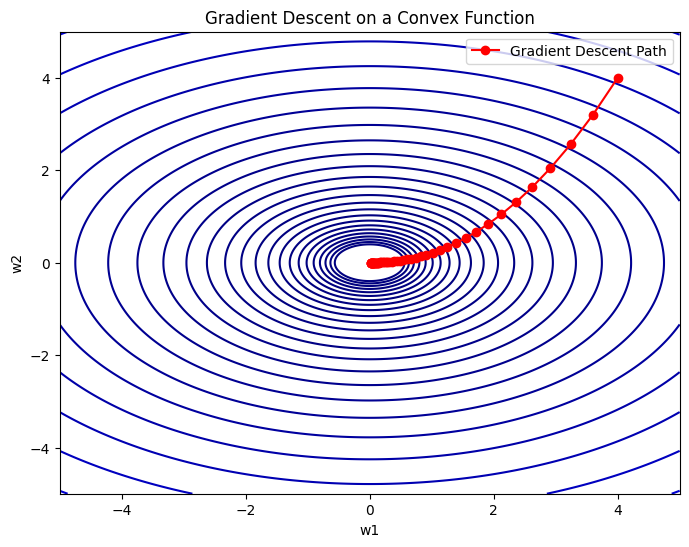

In [ ]:
 # visualize the Gradient Descent Path

w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.05, n_steps=50)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J_convex([W1, W2])

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='Gradient Descent Path')
plt.title("Gradient Descent on a Convex Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()
